**Kernel: myenv (Python 3.8.17)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

In [2]:
# Load the Datasets

cab_data = pd.read_csv("Cab_Data.csv")
customer_data = pd.read_csv("Customer_ID.csv")
transaction_data = pd.read_csv("Transaction_ID.csv")
city_data = pd.read_csv("City.csv")

In [3]:
# Display the first few rows of each dataset to get an initial sense of the data
print("Cab Data Sample:")
print(cab_data.head())

print("\nCustomer Data Sample:")
print(customer_data.head())

print("\nTransaction Data Sample:")
print(transaction_data.head())

print("\nCity Data Sample:")
print(city_data.head())

Cab Data Sample:
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  

Customer Data Sample:
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

Transaction Data Sample:
   Transaction 

In [4]:
# List field names and data types for each dataset
def list_fields_and_data_types(df):
    print("\nField Names and Data Types:")
    for column, dtype in zip(df.columns, df.dtypes):
        print(f"{column}: {dtype}")

print("\nCab Data:")
list_fields_and_data_types(cab_data)

print("\nCustomer Data:")
list_fields_and_data_types(customer_data)

print("\nTransaction Data:")
list_fields_and_data_types(transaction_data)

print("\nCity Data:")
list_fields_and_data_types(city_data)


Cab Data:

Field Names and Data Types:
Transaction ID: int64
Date of Travel: int64
Company: object
City: object
KM Travelled: float64
Price Charged: float64
Cost of Trip: float64

Customer Data:

Field Names and Data Types:
Customer ID: int64
Gender: object
Age: int64
Income (USD/Month): int64

Transaction Data:

Field Names and Data Types:
Transaction ID: int64
Customer ID: int64
Payment_Mode: object

City Data:

Field Names and Data Types:
City: object
Population: object
Users: object


### **Initial EDA**

In [5]:


# Display basic statistics
print("Basic Statistics of Cab Data:")
print(cab_data.describe())

# Check for missing values
print("\nMissing Values in Cab Data:")
print(cab_data.isnull().sum())


# Load City Data
city_data = pd.read_csv("City.csv")

# Display basic statistics
print("\nBasic Statistics of City Data:")
print(city_data.describe())

# Check for missing values
print("\nMissing Values in City Data:")
print(city_data.isnull().sum())

# Descriptive Statistics

# Calculate mean and median of 'Price Charged' in Cab Data
mean_price = cab_data['Price Charged'].mean()
median_price = cab_data['Price Charged'].median()

print(f"\nMean Price Charged in Cab Data: {mean_price}")
print(f"Median Price Charged in Cab Data: {median_price}")

# Calculate mean and median of 'Income (USD/Month)' in Customer Data
customer_data = pd.read_csv("Customer_ID.csv")
mean_income = customer_data['Income (USD/Month)'].mean()
median_income = customer_data['Income (USD/Month)'].median()

print(f"\nMean Income (USD/Month) in Customer Data: {mean_income}")
print(f"Median Income (USD/Month) in Customer Data: {median_income}")

# Cross-tabulation

# Load Transaction Data
transaction_data = pd.read_csv("Transaction_ID.csv")

# Create a cross-tabulation between 'Company' and 'City' in Cab Data
cross_tab_cab = pd.crosstab(cab_data['Company'], cab_data['City'])

# Create a cross-tabulation between 'Gender' and 'Age' in Customer Data
cross_tab_customer = pd.crosstab(customer_data['Gender'], customer_data['Age'])

# Display the cross-tabulation for Cab Data
print("\nCross-Tabulation between 'Company' and 'City' in Cab Data:")
print(cross_tab_cab)

# Display the cross-tabulation for Customer Data
print("\nCross-Tabulation between 'Gender' and 'Age' in Customer Data:")
print(cross_tab_customer)



Basic Statistics of Cab Data:
       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  

Missing Values in Cab Data:
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled  

### **Field/Feature Transformations**: 

In [6]:

# Creating 'Travel Day', 'Price per KM', and 'Profit' columns

# Define a function to convert Excel date format to datetime
def excel_to_datetime(excel_date):
    return dt.datetime(1899, 12, 30) + dt.timedelta(days=excel_date)

# Convert the 'Date of Travel' column to datetime
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(excel_to_datetime)

# Now, you can perform the desired transformations
cab_data['Travel Day'] = cab_data['Date of Travel'].dt.day_name()
cab_data['Travel Month'] = cab_data['Date of Travel'].dt.month
cab_data['Travel Year'] = cab_data['Date of Travel'].dt.year

# Calculate price per kilometer
cab_data['Price per KM'] = cab_data['Price Charged'] / cab_data['KM Travelled']

# Calculate profit (Price Charged - Cost of Trip)
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Travel Day,Travel Month,Travel Year,Price per KM,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Friday,1,2016,12.182266,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Wednesday,1,2016,12.526904,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Saturday,1,2016,13.849558,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Thursday,1,2016,11.377751,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Sunday,1,2016,13.129439,16.844


In [7]:


# Binning Age into Age Groups
bins = [0, 18, 35, 60, float("inf")]
labels = ['Young', 'Young Adult', 'Middle-aged', 'Senior']
customer_data['Age Group'] = pd.cut(customer_data['Age'], bins=bins, labels=labels)

# Min-Max Scaling for Income (USD/Month)
min_income = customer_data['Income (USD/Month)'].min()
max_income = customer_data['Income (USD/Month)'].max()
customer_data['Scaled Income'] = (customer_data['Income (USD/Month)'] - min_income) / (max_income - min_income)

# Print the updated DataFrame
customer_data.head() # Print the first few rows to verify the changes


,Customer ID,Gender,Age,Income (USD/Month),Age Group,Scaled Income
0,29290,Male,28,10813,Young Adult,0.267061
1,27703,Male,27,9237,Young Adult,0.219303
2,28712,Male,53,11242,Middle-aged,0.280061
3,28020,Male,23,23327,Young Adult,0.646273
4,27182,Male,33,8536,Young Adult,0.198061



Scaled income is a transformation of individual income values within a dataset, typically done to standardize them into a common range, such as 0 to 1, making them suitable for analysis and modeling.

In [8]:
# Convert the "Payment_Mode" variable to numerical values (0 for Cash and 1 for Card)
transaction_data['Payment_Mode'] = transaction_data['Payment_Mode'].map({'Cash': 0, 'Card': 1})

# Display the updated dataset
print('Cash is 0, card is 1')
transaction_data.head()


Cash is 0, card is 1


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,1
1,10000012,27703,1
2,10000013,28712,0
3,10000014,28020,0
4,10000015,27182,1


### **Cleaning Data**

In [9]:
# Clean the "Population" column by removing commas and spaces and converting to numeric
city_data['Population'] = city_data['Population'].str.replace(',', '').str.strip().astype(float)

# Clean the "Users" column by removing commas and spaces and converting to numeric
city_data['Users'] = city_data['Users'].str.replace(',', '').str.strip().astype(float)

# Calculate the ratio of cab users to the city's population
city_data['Cab_Users_Per_Capita'] = city_data['Users'] / city_data['Population']

# Display the updated dataset
print(city_data)

                City  Population     Users  Cab_Users_Per_Capita
0        NEW YORK NY   8405837.0  302149.0              0.035945
1         CHICAGO IL   1955130.0  164468.0              0.084121
2     LOS ANGELES CA   1595037.0  144132.0              0.090363
3           MIAMI FL   1339155.0   17675.0              0.013199
4     SILICON VALLEY   1177609.0   27247.0              0.023138
5      ORANGE COUNTY   1030185.0   12994.0              0.012613
6       SAN DIEGO CA    959307.0   69995.0              0.072964
7         PHOENIX AZ    943999.0    6133.0              0.006497
8          DALLAS TX    942908.0   22157.0              0.023499
9         ATLANTA GA    814885.0   24701.0              0.030312
10         DENVER CO    754233.0   12421.0              0.016468
11         AUSTIN TX    698371.0   14978.0              0.021447
12        SEATTLE WA    671238.0   25063.0              0.037338
13         TUCSON AZ    631442.0    5712.0              0.009046
14  SAN FRANCISCO CA    6

### **Creating Master Data (Joining Datasets)**

In [10]:
# Assuming you've already loaded the datasets into variables: cab_data, transaction_data, customer_data, and city_data

# Join Cab Data and Transaction Data
master_data = cab_data.merge(transaction_data, on='Transaction ID', how='inner')

# Join Customer Data
master_data = master_data.merge(customer_data, on='Customer ID', how='left')

# Optionally, join City Data (if needed)
master_data = master_data.merge(city_data, on='City', how='left')


1. Cab Data and Transaction Data:

**Common Key:** The common key between these datasets is "Transaction ID," which uniquely identifies each cab transaction.
Relationship: These datasets are related by the cab rides taken by customers. The "Cab Data" contains information about individual cab trips, including details such as the date of travel, the cab company, the city, distance traveled (KM), price charged, and cost of the trip. The "Transaction Data" provides additional details about each transaction, including the customer ID and the payment mode used for the transaction.

**Insights:** By joining these datasets on "Transaction ID," you can analyze various aspects of cab transactions. For example, you can calculate the total revenue generated by each cab company, assess payment preferences (cash or card), and analyze trends in cab usage over time.

2. Cab Data and Customer Data:

**Common Key:** There is no direct common key between these datasets.
Relationship: While there is no direct common key, you can establish a relationship between these datasets by combining them through the "Transaction Data." The "Customer ID" in the "Transaction Data" can be used to link individual cab trips in the "Cab Data" to specific customers in the "Customer Data."

**Insights:** This linkage allows you to analyze customer-specific behaviors, such as understanding the demographics of cab users (age, gender), their travel patterns, and the relationship between customer characteristics and the distance traveled or price charged.

3. Cab Data, Transaction Data, and Customer Data:

**Common Key:** The "Transaction ID" is the common key that links these three datasets.
Relationship: Combining all three datasets using "Transaction ID" enables a comprehensive view of individual cab transactions along with customer details. This forms the core of your analysis and provides insights into how different factors (e.g., customer characteristics, transaction details) influence cab rides.

**Insights:** With this combined dataset, you can explore a wide range of questions, such as customer segmentation based on age, gender, and income, analyzing customer preferences in terms of payment modes, and assessing the profitability of each cab ride based on the cost and price charged.

4. City Data:

**Common Key:** There is no direct common key with the other datasets.
Relationship: The "City Data" provides city-level information, including population and the number of users. While not directly linked to other datasets, it can be used for city-level analysis and comparisons.

**Insights:** By analyzing "City Data" alongside the core datasets, you can gain insights into how cab usage varies across different cities. For example, you can calculate metrics such as cab users per capita and assess whether city characteristics (e.g., population) influence cab service demand.
Overall, combining these datasets allows to explore relationships between cab trips, customer attributes, transaction details, and city-level factors. This comprehensive view can help you identify trends, patterns, and actionable insights to guide a private firm's investment decisions in the cab industry.

### **Identify and Remove Duplicates**

In [11]:

master_data_no_duplicates = master_data.drop_duplicates()

# If you want to reset the index after removing duplicates
master_data_no_duplicates.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned dataset
print(master_data_no_duplicates.head())

# Check the shape to see how many duplicates were removed
print("Original Dataset Shape:", master_data.shape)
print("Cleaned Dataset Shape:", master_data_no_duplicates.shape)

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip Travel Day  Travel Month  Travel Year  ...  \
0         370.95       313.635     Friday             1         2016  ...   
1         358.52       334.854  Wednesday             1         2016  ...   
2         125.20        97.632   Saturday             1         2016  ...   
3         377.40       351.602   Thursday             1         2016  ...   
4         114.62        97.776     Sunday             1         2016  ...   

   Customer ID  Payment_Mode  Gender  Age Income (USD/Month)    Age Group  \
0        29290             

### **Handling Missing Values, Outliers, and Other Data Cleaning Tasks as Needed.**

In [12]:
# Handle outliers in the entire master data for numerical columns
numerical_columns = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)']

# Define a function to handle outliers using IQR method
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[column] = dataframe[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Apply outlier handling to all numerical columns
for column in numerical_columns:
    handle_outliers(master_data, column)

# Display summary statistics after handling outliers
print("Summary Statistics After Handling Outliers:")
master_data.describe()



Summary Statistics After Handling Outliers:


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Travel Month,Travel Year,Price per KM,Profit,Customer ID,Payment_Mode,Age,Income (USD/Month),Scaled Income,Population,Users,Cab_Users_Per_Capita
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,1.022076e+07,2017-08-17 01:37:55.042293760,22.567254,421.071797,286.190113,7.500434,2017.045199,18.765127,137.253198,19191.652115,0.599635,35.336705,15048.822937,0.395419,3.132198e+06,158365.582267,0.106687
min,1.000001e+07,2016-01-02 00:00:00,1.900000,15.600000,19.000000,1.000000,2016.000000,6.338621,-220.060000,1.000000,0.000000,18.000000,2000.000000,0.000000,2.489680e+05,3643.000000,0.006497
25%,1.011081e+07,2016-11-23 00:00:00,12.000000,206.437500,151.200000,5.000000,2016.000000,14.451327,28.012000,2705.000000,0.000000,25.000000,8424.000000,0.194667,6.712380e+05,80021.000000,0.035945
50%,1.022104e+07,2017-09-10 00:00:00,22.440000,386.360000,282.480000,8.000000,2017.000000,17.153501,81.962000,7459.000000,1.000000,33.000000,14685.000000,0.384394,1.595037e+06,144132.000000,0.072964
75%,1.033094e+07,2018-05-12 00:00:00,32.960000,583.660000,413.683200,10.000000,2018.000000,22.234926,190.030000,36078.000000,1.000000,42.000000,21035.000000,0.576818,8.405837e+06,302149.000000,0.090363
max,1.044011e+07,2018-12-31 00:00:00,48.000000,1149.493750,691.200000,12.000000,2018.000000,53.955556,1463.966000,60000.000000,1.000000,65.000000,35000.000000,1.000000,8.405837e+06,302149.000000,0.321411
std,1.268058e+05,NaN,12.233526,266.871835,157.993661,3.445095,0.800239,5.878560,160.311840,21012.412463,0.489973,12.594234,7969.409482,0.241497,3.315194e+06,100850.051020,0.106331


In [13]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Travel Day', 'Travel Month',
       'Travel Year', 'Price per KM', 'Profit', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Age Group', 'Scaled Income',
       'Population', 'Users', 'Cab_Users_Per_Capita'],
      dtype='object')

### **Data Vizualization**

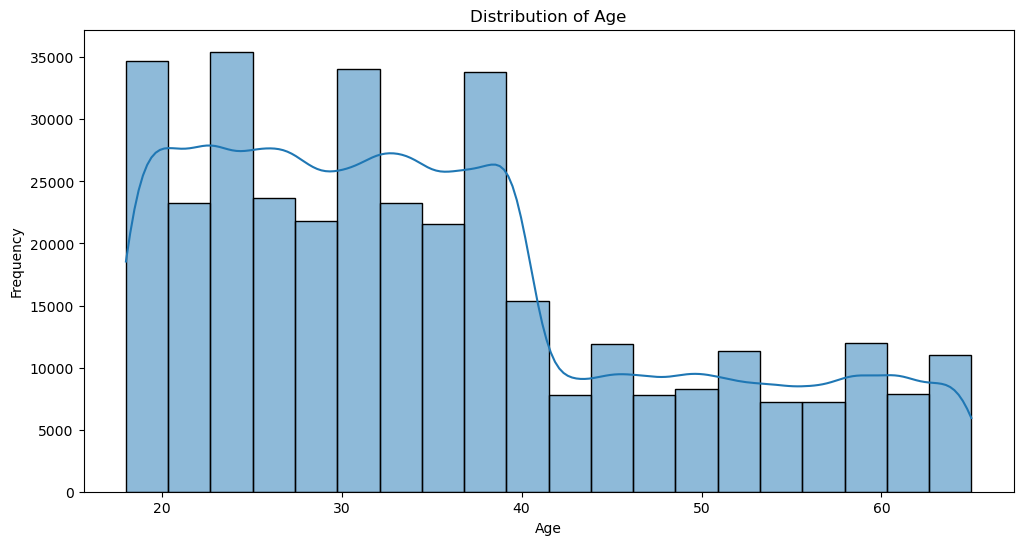

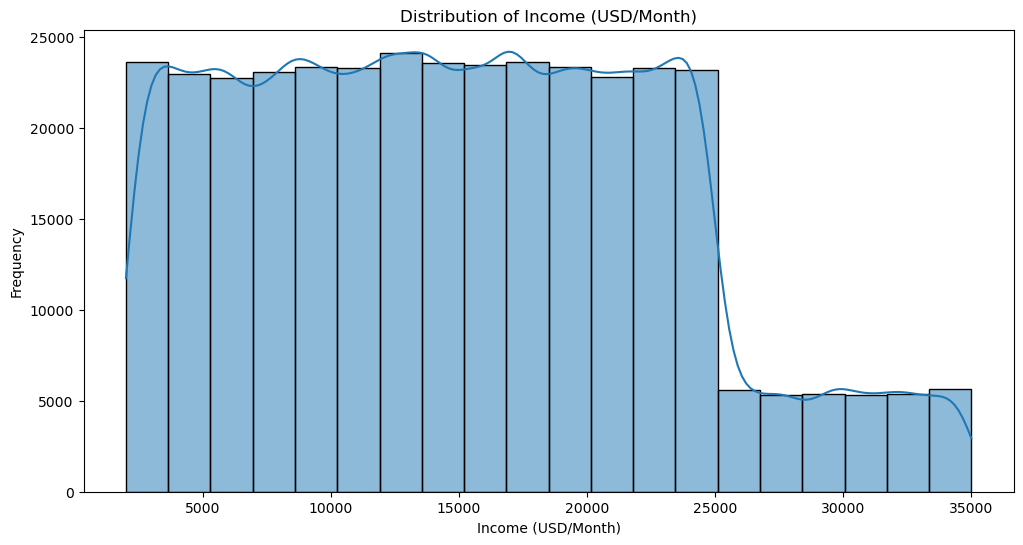

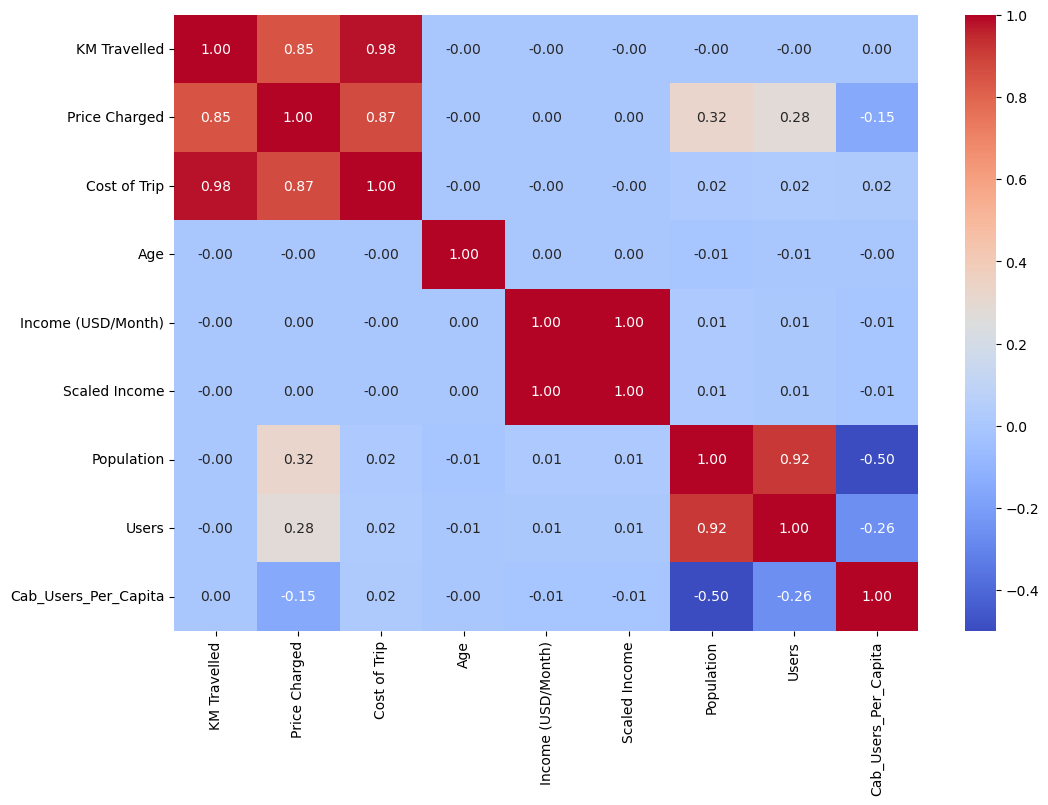

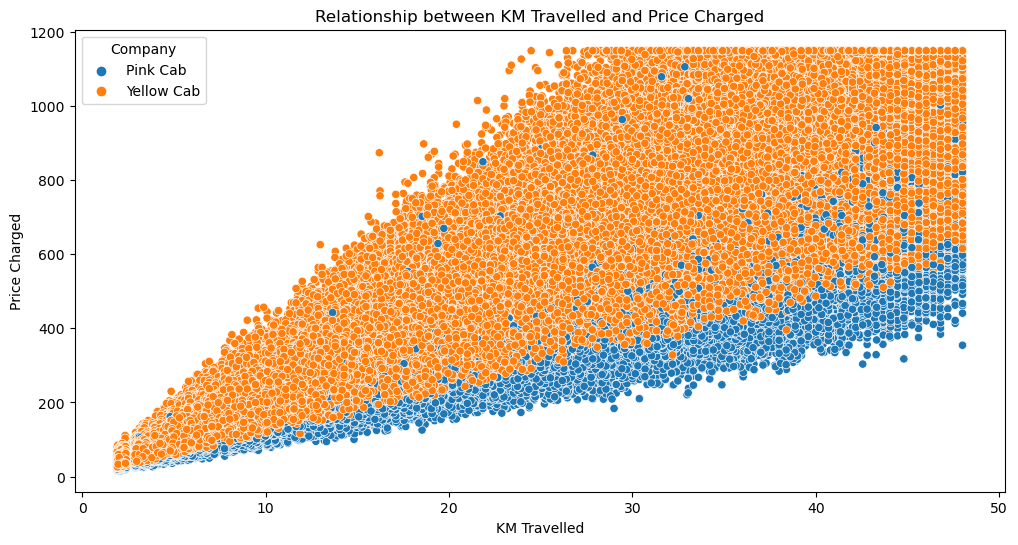

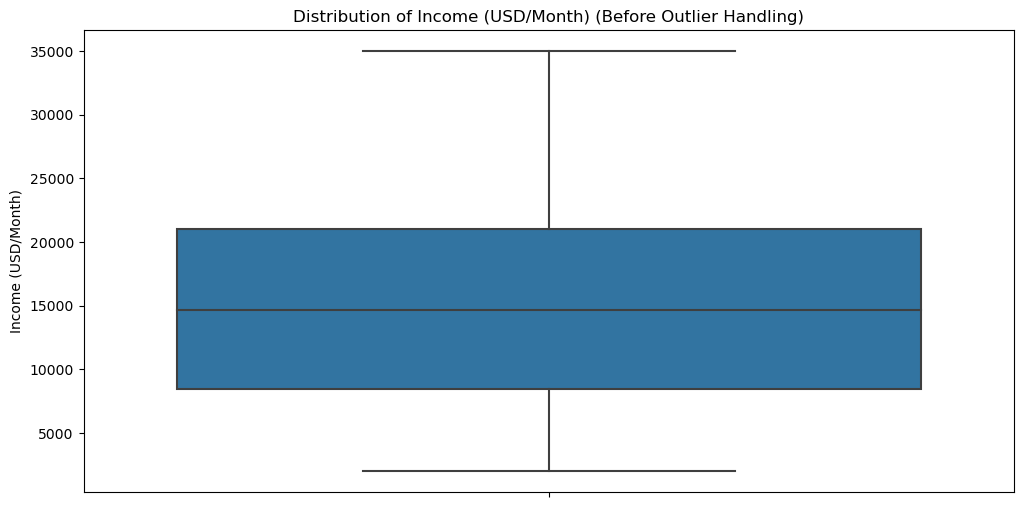

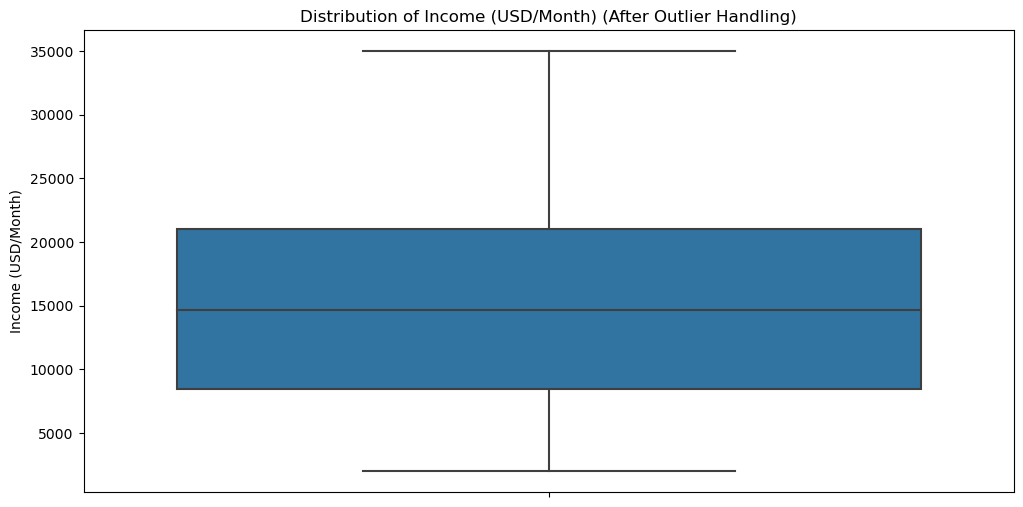

In [14]:

# Visualize data distributions for Age
plt.figure(figsize=(12, 6))
sns.histplot(data=master_data, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize data distributions for Income
plt.figure(figsize=(12, 6))
sns.histplot(data=master_data, x='Income (USD/Month)', bins=20, kde=True)
plt.title('Distribution of Income (USD/Month)')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Frequency')
plt.show()

# List of numeric columns you want to include in the correlation matrix
numeric_columns = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Scaled Income', 'Population', 'Users', 'Cab_Users_Per_Capita']

# Create a new DataFrame containing only the numeric columns
numeric_data = master_data[numeric_columns]

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


# Visualize the relationship between Price Charged and KM Travelled
plt.figure(figsize=(12, 6))
sns.scatterplot(data=master_data, x='KM Travelled', y='Price Charged', hue='Company')
plt.title('Relationship between KM Travelled and Price Charged')
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.legend(title='Company')
plt.show()

# Identify and handle outliers in Income (USD/Month)
plt.figure(figsize=(12, 6))
sns.boxplot(data=master_data, y='Income (USD/Month)')
plt.title('Distribution of Income (USD/Month) (Before Outlier Handling)')
plt.ylabel('Income (USD/Month)')
plt.show()

# Handling outliers in Income (USD/Month) using z-scores
from scipy import stats
z_scores_income = stats.zscore(master_data['Income (USD/Month)'])
threshold_income = 3
outlier_indices_income = np.where(np.abs(z_scores_income) > threshold_income)[0]
master_data_cleaned = master_data.drop(index=outlier_indices_income)

plt.figure(figsize=(12, 6))
sns.boxplot(data=master_data_cleaned, y='Income (USD/Month)')
plt.title('Distribution of Income (USD/Month) (After Outlier Handling)')
plt.ylabel('Income (USD/Month)')
plt.show()


### **Feature Engineering**

In [15]:

# - Create new features from existing ones
# - Age Groups, Income Bins, Profit Margin
master_data['Age_Group'] = pd.cut(master_data['Age'], bins=[0, 18, 35, 50, 100], labels=['<18', '18-35', '36-50', '50+'])
master_data['Income_Group'] = pd.cut(master_data['Income (USD/Month)'], bins=[0, 2000, 4000, 6000, 10000], labels=['<2000', '2000-4000', '4000-6000', '6000+'])
master_data['Profit_Margin'] = master_data['Price Charged'] - master_data['Cost of Trip']


### **Hypothesis Testing**

In [16]:
# Define a significance level
alpha = 0.05

# Helper function for printing hypothesis test results
def print_hypothesis_result(test_name, p_value, alpha):
    print(f"\n{test_name}:")
    print(f"Null Hypothesis: {null_hypothesis}")
    print(f"Alternative Hypothesis: {alternative_hypothesis}")
    print(f"P-Value: {p_value:.4f}")
    
    if p_value < alpha:
        print("Result: Reject Null Hypothesis")
    else:
        print("Result: Fail to Reject Null Hypothesis")



# Test 1: T-test to compare the average age between Pink Cab and Yellow Cab customers
null_hypothesis = "There is no significant difference in the average age between Pink Cab and Yellow Cab customers."
alternative_hypothesis = "There is a significant difference in the average age between Pink Cab and Yellow Cab customers."

pink_cab_age = master_data[master_data['Company'] == 'Pink Cab']['Age']
yellow_cab_age = master_data[master_data['Company'] == 'Yellow Cab']['Age']

t_stat_age, p_value_age = stats.ttest_ind(pink_cab_age, yellow_cab_age)
print_hypothesis_result("T-test for Age", p_value_age, alpha)

# Test 2: Chi-square test of independence between Payment Mode and Gender
null_hypothesis = "Payment mode and gender are independent."
alternative_hypothesis = "Payment mode and gender are not independent."

observed_payment_gender = pd.crosstab(master_data['Payment_Mode'], master_data['Gender'])
chi2, p_value_payment_gender, _, _ = stats.chi2_contingency(observed_payment_gender)
print_hypothesis_result("Chi-square Test for Payment Mode and Gender", p_value_payment_gender, alpha)

# Test 3: ANOVA to compare average profit among different age groups
null_hypothesis = "There is no significant difference in average profit among age groups."
alternative_hypothesis = "There is a significant difference in average profit among age groups."

bins = [18, 25, 35, 50, 65, np.inf]
labels = ['18-24', '25-34', '35-49', '50-64', '65+']
master_data['Age Group'] = pd.cut(master_data['Age'], bins=bins, labels=labels)

age_groups = master_data['Age Group'].dropna().unique()
anova_results = []

for age_group in age_groups:
    group_data = master_data[master_data['Age Group'] == age_group]['Profit']
    anova_results.append(group_data)

f_stat_age, p_value_anova_age = stats.f_oneway(*anova_results)
print_hypothesis_result("ANOVA for Average Profit Among Age Groups", p_value_anova_age, alpha)

# Test 4: T-test to compare the profitability (profit per ride) of Pink Cab and Yellow Cab
null_hypothesis = "There is no significant difference in profitability between Pink Cab and Yellow Cab."
alternative_hypothesis = "There is a significant difference in profitability between Pink Cab and Yellow Cab."

pink_cab_profit_per_ride = pink_cab_age / pink_cab_age.shape[0]
yellow_cab_profit_per_ride = yellow_cab_age / yellow_cab_age.shape[0]

t_stat_profit, p_value_profit = stats.ttest_ind(pink_cab_profit_per_ride, yellow_cab_profit_per_ride)
print_hypothesis_result("T-test for Profitability", p_value_profit, alpha)






T-test for Age:
Null Hypothesis: There is no significant difference in the average age between Pink Cab and Yellow Cab customers.
Alternative Hypothesis: There is a significant difference in the average age between Pink Cab and Yellow Cab customers.
P-Value: 0.7056
Result: Fail to Reject Null Hypothesis

Chi-square Test for Payment Mode and Gender:
Null Hypothesis: Payment mode and gender are independent.
Alternative Hypothesis: Payment mode and gender are not independent.
P-Value: 0.9645
Result: Fail to Reject Null Hypothesis

ANOVA for Average Profit Among Age Groups:
Null Hypothesis: There is no significant difference in average profit among age groups.
Alternative Hypothesis: There is a significant difference in average profit among age groups.
P-Value: 0.0000
Result: Reject Null Hypothesis

T-test for Profitability:
Null Hypothesis: There is no significant difference in profitability between Pink Cab and Yellow Cab.
Alternative Hypothesis: There is a significant difference in pro

In [17]:

# Segmentation
# - Segment data based on relevant criteria (e.g., Age Groups, Income Groups)
# - Analyze each segment separately
age_groups = master_data.groupby('Age_Group')
for age_group, group_data in age_groups:
    # Analyze each age group separately
    print(f"Age Group: {age_group}")
    print(group_data.describe())

Age Group: <18
       Transaction ID                 Date of Travel  KM Travelled  \
count    1.084600e+04                          10846  10846.000000   
mean     1.022058e+07  2017-08-16 10:04:37.484786944     22.525875   
min      1.000004e+07            2016-01-02 00:00:00      1.900000   
25%      1.011359e+07            2016-11-28 00:00:00     11.880000   
50%      1.022158e+07            2017-09-10 00:00:00     22.470000   
75%      1.032786e+07            2018-05-01 00:00:00     32.860000   
max      1.044010e+07            2018-12-31 00:00:00     48.000000   
std      1.256069e+05                            NaN     12.260955   

       Price Charged  Cost of Trip  Travel Month   Travel Year  Price per KM  \
count   10846.000000  10846.000000  10846.000000  10846.000000  10846.000000   
mean      421.672591    285.160957      7.498433   2017.043426     18.787322   
min        16.760000     19.400000      1.000000   2016.000000      7.674757   
25%       203.957500    148.512000

### **Time Series Analyses**

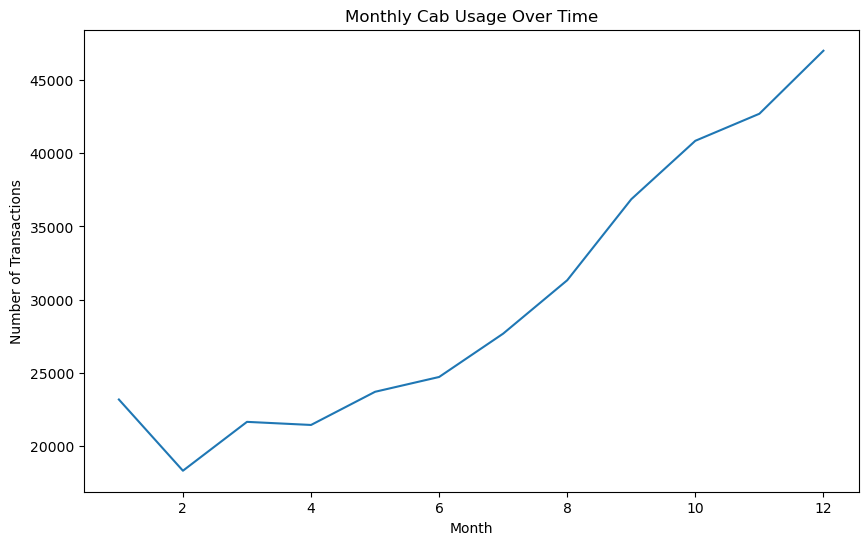

<Figure size 1000x600 with 0 Axes>

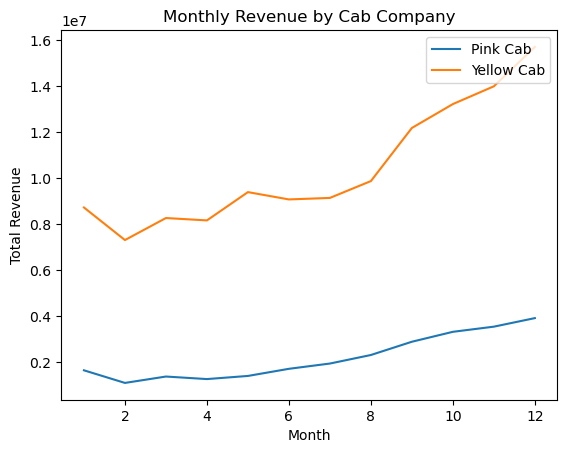

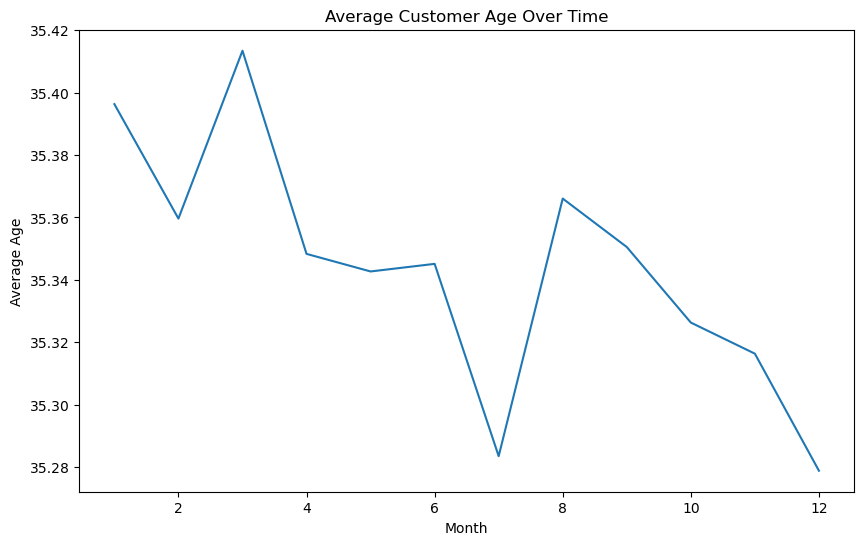

<Figure size 1200x800 with 0 Axes>

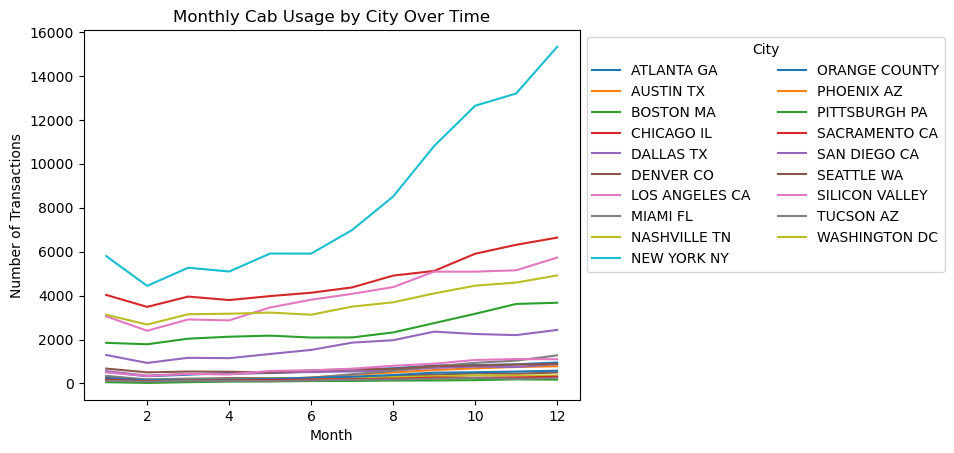

<Figure size 1200x800 with 0 Axes>

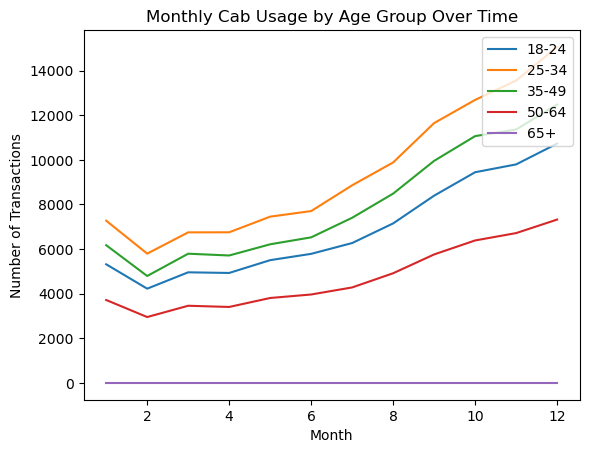

In [18]:

# Analyze seasonality or trends over time
# Cab usage by month
monthly_usage = master_data.groupby('Travel Month')['Transaction ID'].count()

# Visualize monthly cab usage
plt.figure(figsize=(10, 6))
monthly_usage.plot(kind='line')
plt.title('Monthly Cab Usage Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Revenue Trend Analysis
# Analyze the revenue generated by each cab company over time
monthly_revenue = master_data.groupby(['Travel Month', 'Company'])['Price Charged'].sum().unstack()

# Create a line plot for monthly revenue for each cab company
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line')
plt.title('Monthly Revenue by Cab Company')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(loc='upper right')
plt.show()

# Customer Demographics Analysis

# Analyze how the average age of customers changes over time
monthly_avg_age = master_data.groupby('Travel Month')['Age'].mean()

# Create a line plot for monthly average customer age
plt.figure(figsize=(10, 6))
monthly_avg_age.plot(kind='line')
plt.title('Average Customer Age Over Time')
plt.xlabel('Month')
plt.ylabel('Average Age')
plt.show()

# City-Based Analysis

# Analyze cab usage trends in different cities over time
monthly_city_usage = master_data.groupby(['Travel Month', 'City'])['Transaction ID'].count().unstack()

# Create a line plot for monthly cab usage in different cities
plt.figure(figsize=(12, 8))
ax = monthly_city_usage.plot(kind='line')
plt.title('Monthly Cab Usage by City Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

# Customize the legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='City', ncol=2)
plt.show()


# Customer Segment Analysis

# Analyze how the usage patterns differ for various customer segments over time
monthly_age_group_usage = master_data.groupby(['Travel Month', 'Age Group'])['Transaction ID'].count().unstack()

# Create a line plot for monthly cab usage by age group
plt.figure(figsize=(12, 8))
monthly_age_group_usage.plot(kind='line')
plt.title('Monthly Cab Usage by Age Group Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(loc='upper right')
plt.show()


### **Profit Analyses**

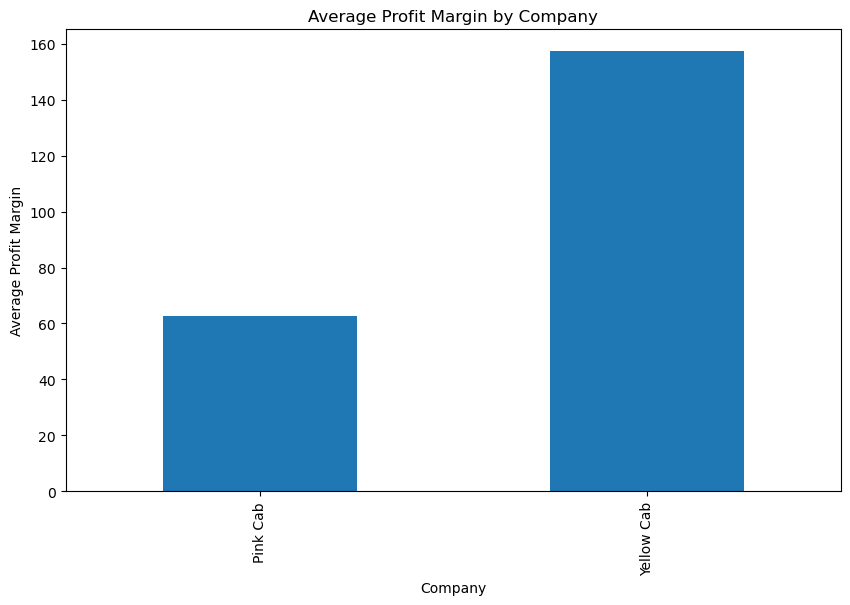

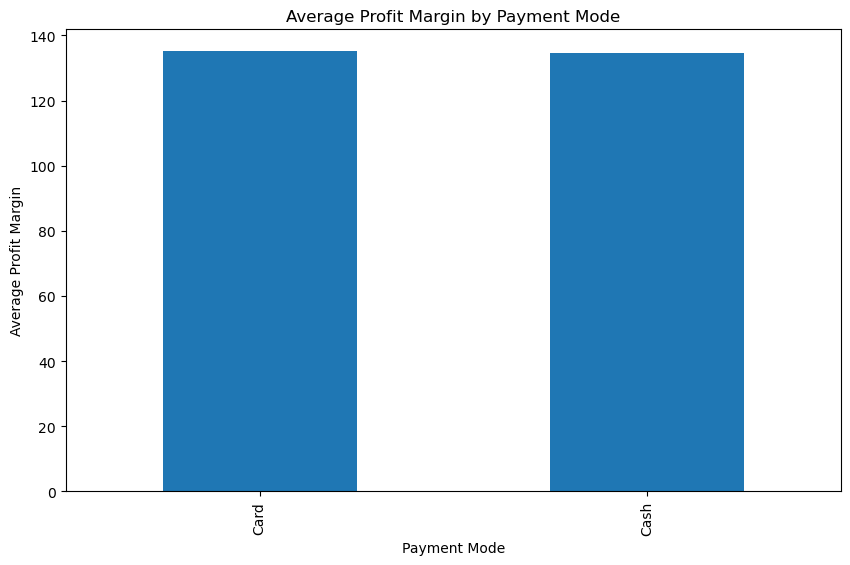

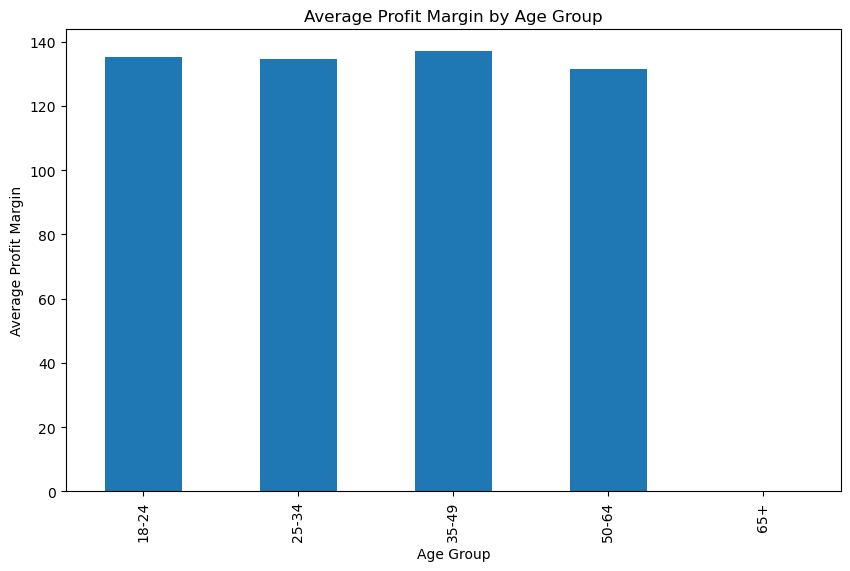

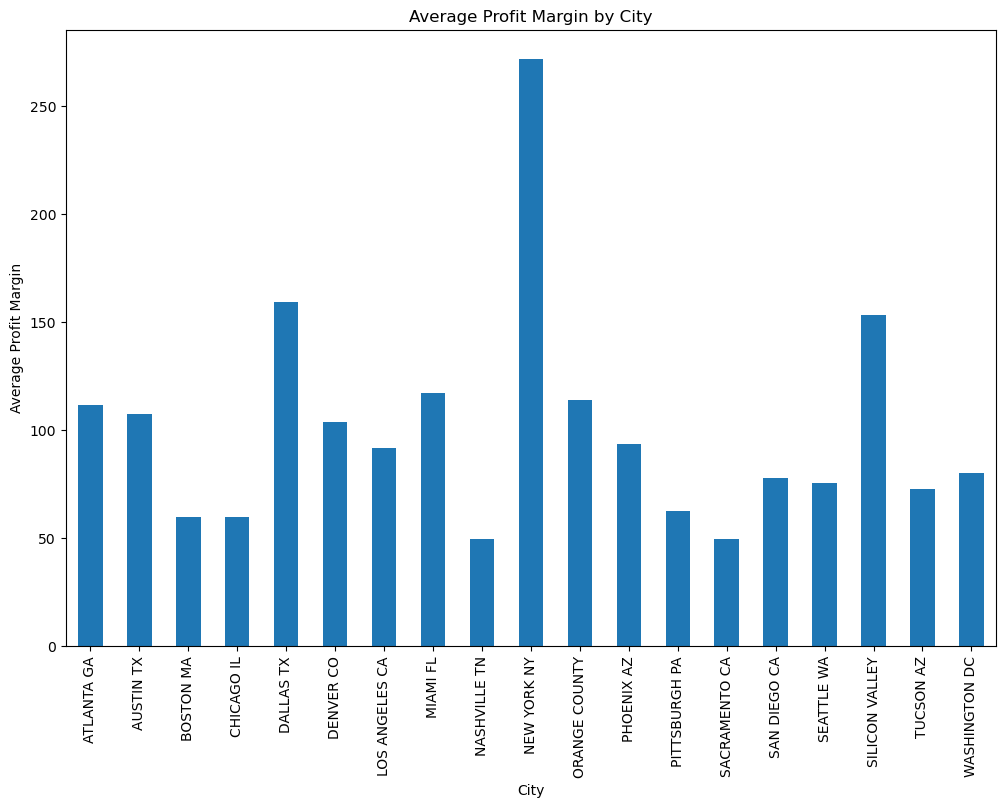

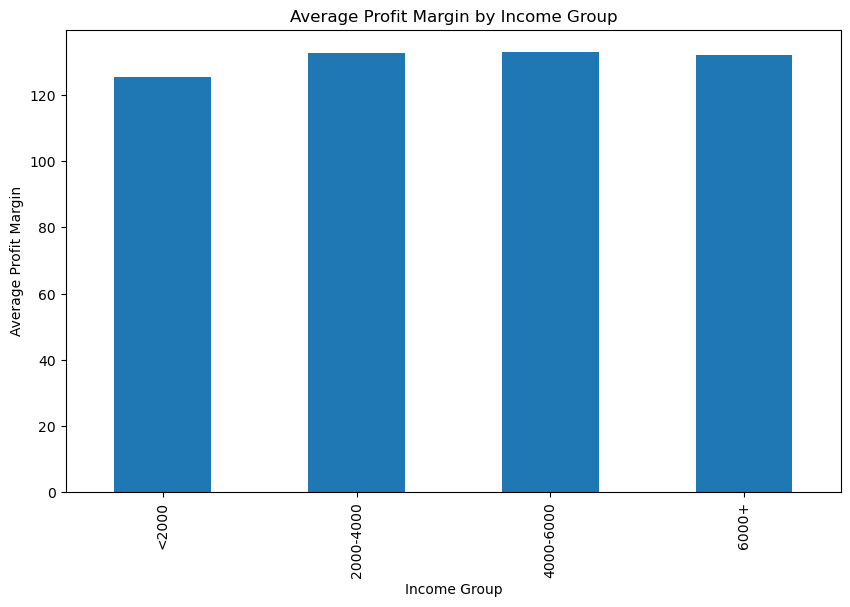

In [19]:


# Analyze factors affecting profit margins
# Company-wise profit analysis
company_profit = master_data.groupby('Company')['Profit_Margin'].mean()

# Visualize profit margins by company
plt.figure(figsize=(10, 6))
company_profit.plot(kind='bar')
plt.title('Average Profit Margin by Company')
plt.xlabel('Company')
plt.ylabel('Average Profit Margin')
plt.show()

# Payment Mode Profit Analysis

# Analyze profit margins based on payment modes
payment_mode_profit = master_data.groupby('Payment_Mode')['Profit_Margin'].mean()

# Define custom labels for the x-axis
payment_mode_labels = {0: 'Card', 1: 'Cash'}

# Map the labels to the payment_mode_profit index
payment_mode_profit.index = payment_mode_profit.index.map(payment_mode_labels)

# Visualize profit margins by payment mode with custom labels
plt.figure(figsize=(10, 6))
payment_mode_profit.plot(kind='bar')
plt.title('Average Profit Margin by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Average Profit Margin')
plt.show()


# Age Group Profit Analysis

# Analyze profit margins based on age groups
age_group_profit = master_data.groupby('Age Group')['Profit_Margin'].mean()

# Visualize profit margins by age group
plt.figure(figsize=(10, 6))
age_group_profit.plot(kind='bar')
plt.title('Average Profit Margin by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Profit Margin')
plt.show()

# City-Based Profit Analysis

# Analyze profit margins in different cities
city_profit = master_data.groupby('City')['Profit_Margin'].mean()

# Visualize profit margins by city
plt.figure(figsize=(12, 8))
city_profit.plot(kind='bar')
plt.title('Average Profit Margin by City')
plt.xlabel('City')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=90)
plt.show()

# Income Group Profit Analysis

# Analyze profit margins based on income groups
income_group_profit = master_data.groupby('Income_Group')['Profit_Margin'].mean()

# Visualize profit margins by income group
plt.figure(figsize=(10, 6))
income_group_profit.plot(kind='bar')
plt.title('Average Profit Margin by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Profit Margin')
plt.show()


### **Customer Behavior Analyses**

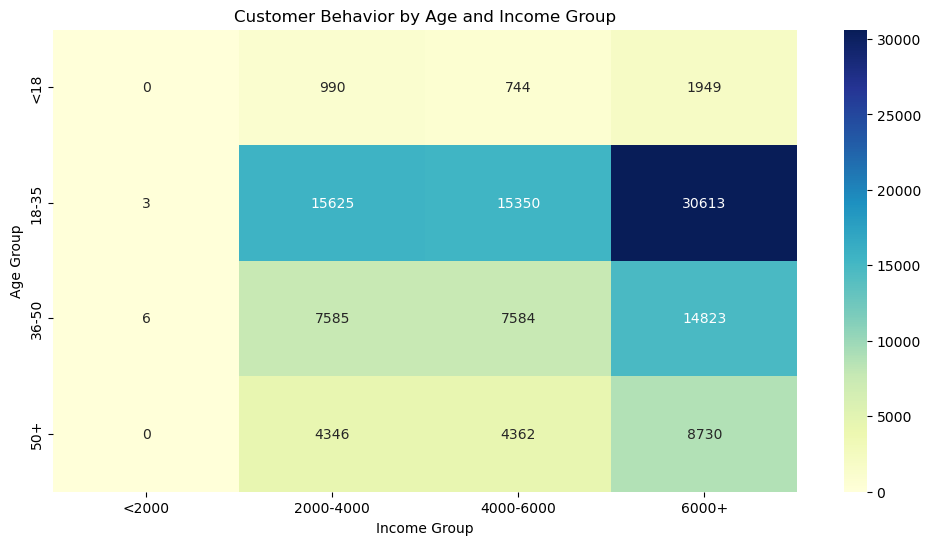

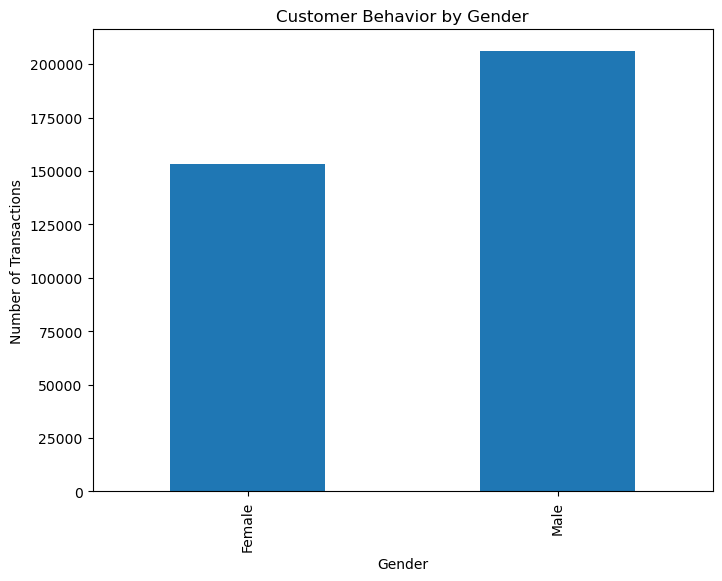

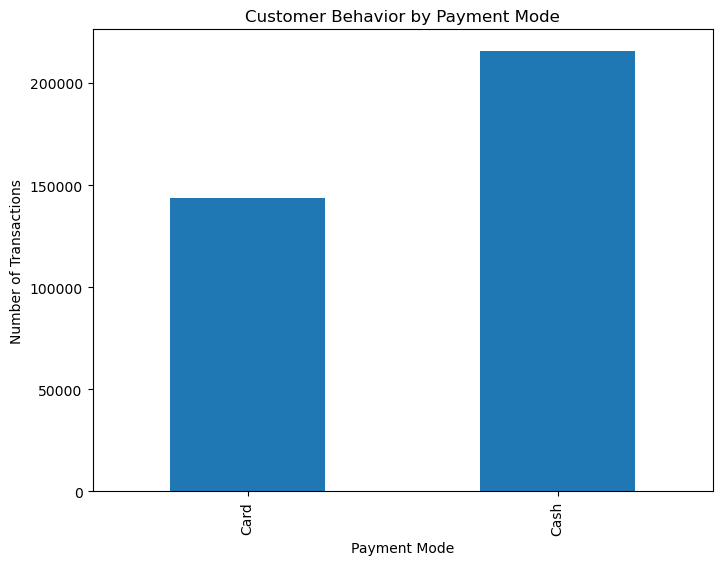

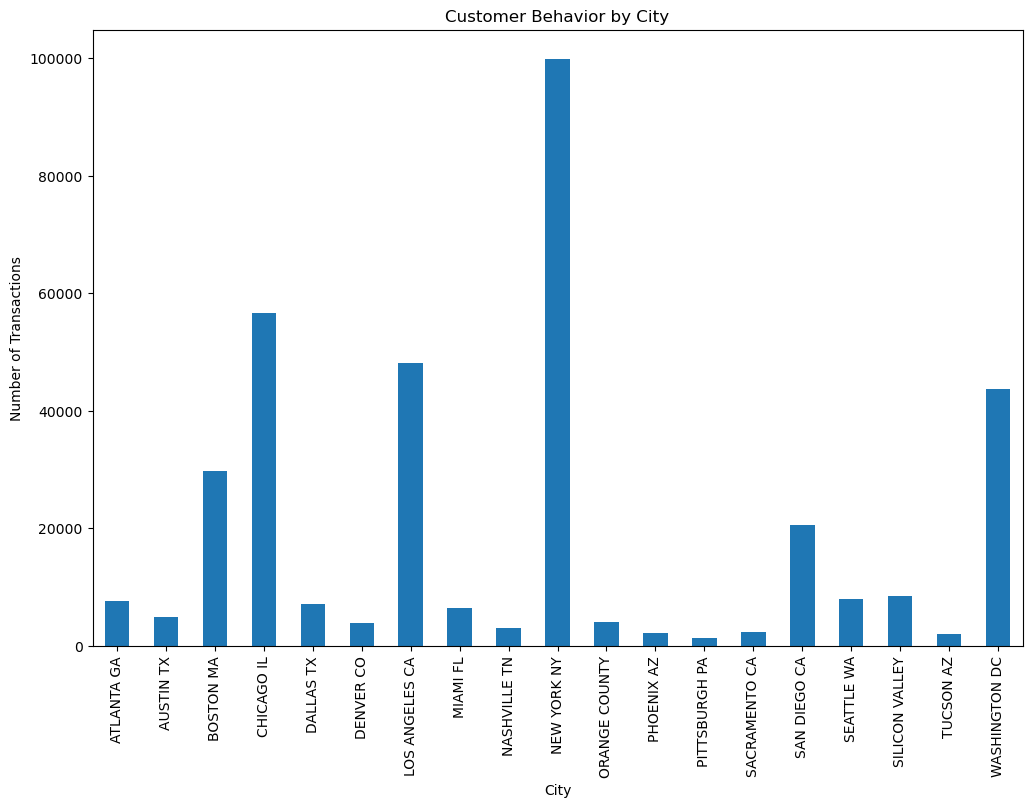

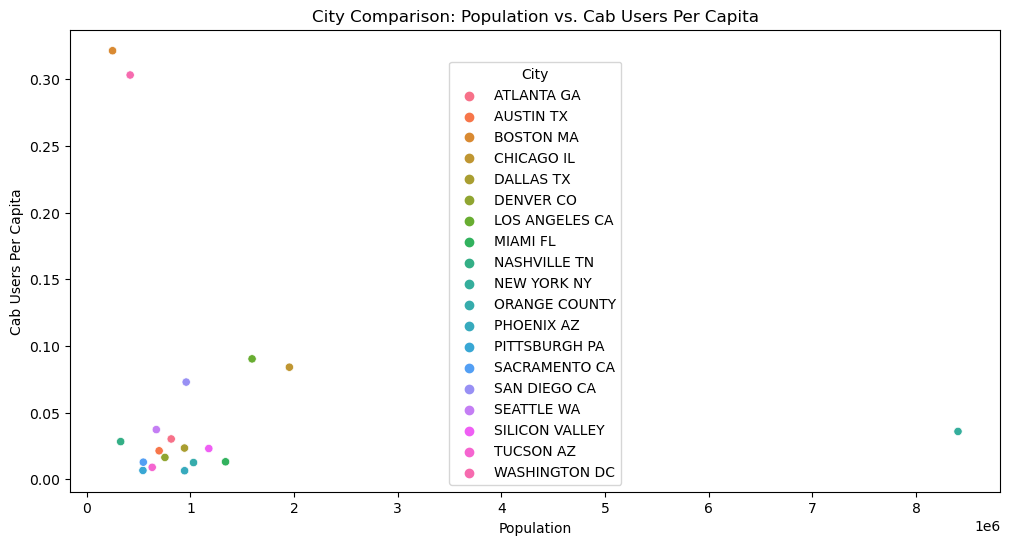

In [20]:


# Explore how customer characteristics affect cab usage
# Age and Income analysis
age_income_analysis = master_data.groupby(['Age_Group', 'Income_Group'])['Transaction ID'].count()

# Visualize customer behavior by age and income
plt.figure(figsize=(12, 6))
sns.heatmap(age_income_analysis.unstack(), cmap='YlGnBu', annot=True, fmt='d')
plt.title('Customer Behavior by Age and Income Group')
plt.xlabel('Income Group')
plt.ylabel('Age Group')
plt.show()

# Customer Gender Analysis

# Explore how customer gender affects cab usage
gender_analysis = master_data.groupby('Gender')['Transaction ID'].count()

# Visualize customer behavior by gender
plt.figure(figsize=(8, 6))
gender_analysis.plot(kind='bar')
plt.title('Customer Behavior by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()

# Payment Mode Analysis

# Explore how payment modes affect cab usage
payment_mode_analysis = master_data.groupby('Payment_Mode')['Transaction ID'].count()

# Define custom labels for the x-axis
payment_mode_labels = {0: 'Card', 1: 'Cash'}

# Map the labels to the payment_mode_analysis index
payment_mode_analysis.index = payment_mode_analysis.index.map(payment_mode_labels)

# Visualize customer behavior by payment mode with custom labels
plt.figure(figsize=(8, 6))
payment_mode_analysis.plot(kind='bar')
plt.title('Customer Behavior by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Transactions')
plt.show()

# City-Based Customer Behavior Analysis

# Explore how customer behavior varies by city
city_behavior = master_data.groupby('City')['Transaction ID'].count()

# Visualize customer behavior by city
plt.figure(figsize=(12, 8))
city_behavior.plot(kind='bar')
plt.title('Customer Behavior by City')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

# City Comparison

# Compare cities in terms of cab usage and relevant factors
city_comparison = master_data.groupby('City')[['Population', 'Cab_Users_Per_Capita']].mean()

# Visualize city comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(data=city_comparison, x='Population', y='Cab_Users_Per_Capita', hue=city_comparison.index)
plt.title('City Comparison: Population vs. Cab Users Per Capita')
plt.xlabel('Population')
plt.ylabel('Cab Users Per Capita')
plt.show()


### **Profit Margin Forecasting**

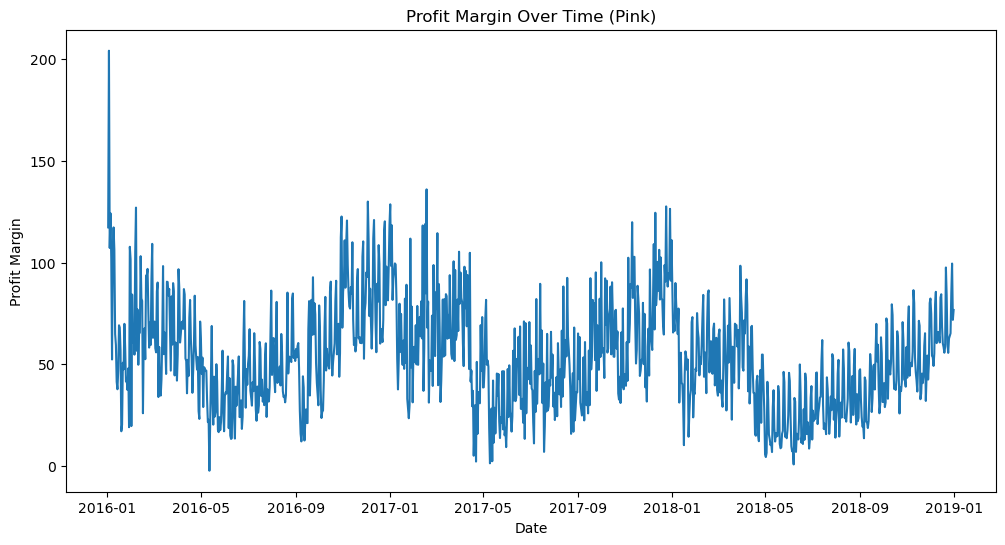

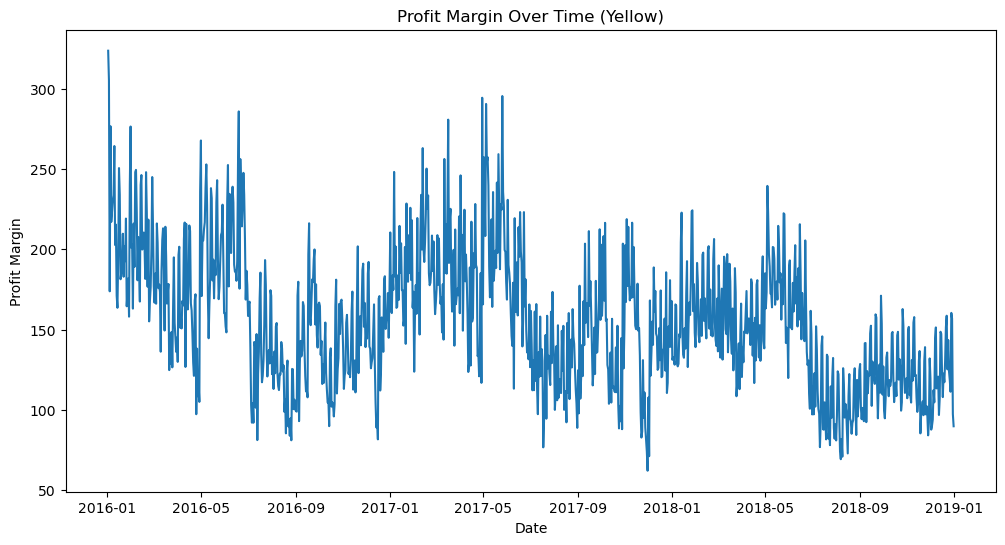

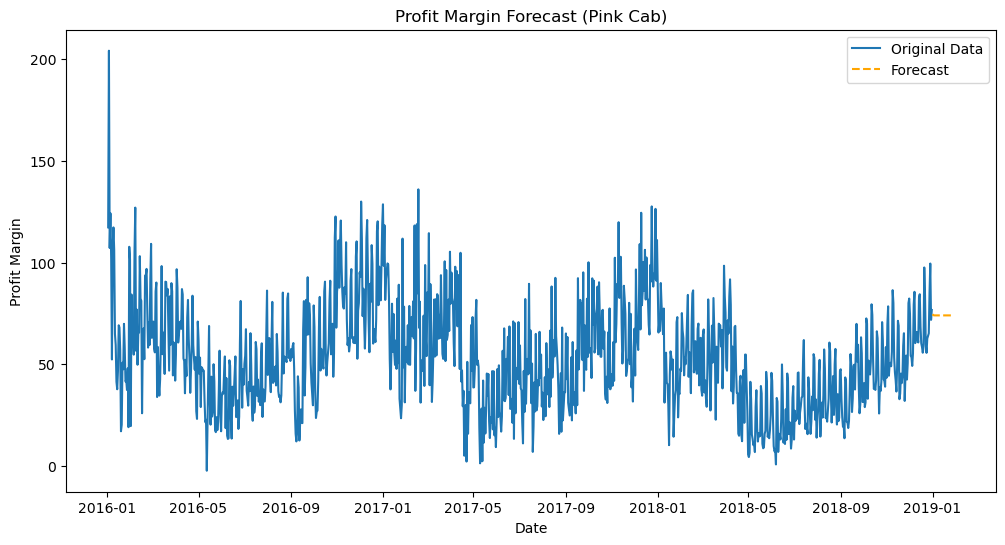

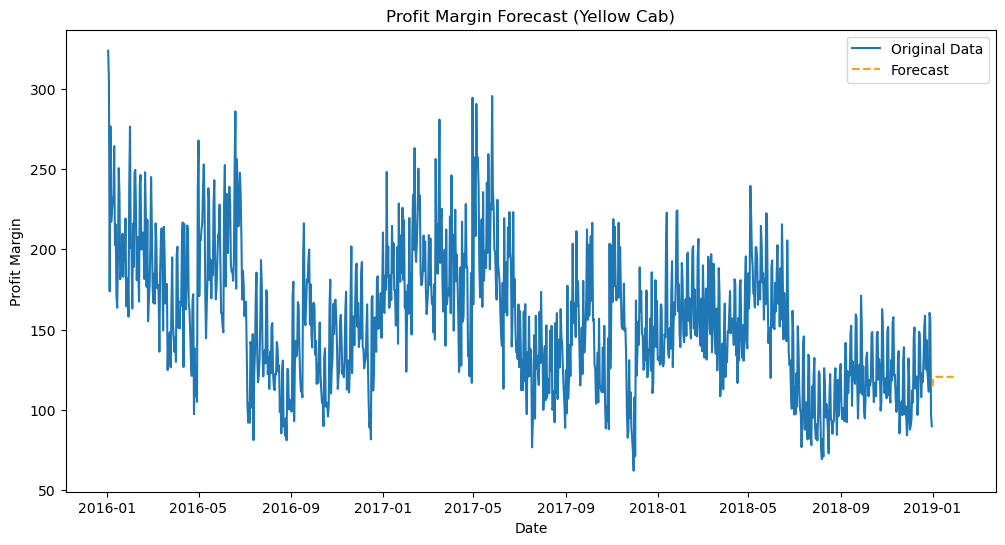

Pink Cab's Forecast:
             Forecast
2018-12-31        NaN
2019-01-01  74.520798
2019-01-02  74.082543
2019-01-03  73.991195
2019-01-04  73.972154
2019-01-05  73.968186
2019-01-06  73.967358
2019-01-07  73.967186
2019-01-08  73.967150
2019-01-09  73.967143
2019-01-10  73.967141
2019-01-11  73.967141
2019-01-12  73.967141
2019-01-13  73.967141
2019-01-14  73.967141
2019-01-15  73.967141
2019-01-16  73.967141
2019-01-17  73.967141
2019-01-18  73.967141
2019-01-19  73.967141
2019-01-20  73.967141
2019-01-21  73.967141
2019-01-22  73.967141
2019-01-23  73.967141
2019-01-24  73.967141
2019-01-25  73.967141
2019-01-26  73.967141
2019-01-27  73.967141
2019-01-28  73.967141
2019-01-29  73.967141

Yellow Cab's Forecast:
              Forecast
2018-12-31         NaN
2019-01-01  114.594715
2019-01-02  119.423586
2019-01-03  120.365410
2019-01-04  120.549104
2019-01-05  120.584932
2019-01-06  120.591919
2019-01-07  120.593282
2019-01-08  120.593548
2019-01-09  120.593600
2019-01-10  120.5936

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to plot time series data
def plot_time_series(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data)
    plt.title(f'Profit Margin Over Time ({title})')
    plt.xlabel('Date')
    plt.ylabel('Profit Margin')
    plt.show()

# Function to fit an ARIMA model
def fit_arima_model(data, order):
    model = sm.tsa.ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

# Function to generate a forecast
def generate_forecast(model_fit, steps, last_date):
    forecast = model_fit.forecast(steps=steps)
    forecast_index = pd.date_range(start=last_date, periods=steps)
    forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)
    return forecast_df

# Convert 'Date of Travel' to a datetime object
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'], format='%Y-%m-%d')
pink_data = master_data[master_data['Company'] == 'Pink Cab']
yellow_data = master_data[master_data['Company'] == 'Yellow Cab']

# Set 'Date of Travel' as the index
pink_data.set_index('Date of Travel', inplace=True)
yellow_data.set_index('Date of Travel', inplace=True)

# Select only the numeric columns for resampling
numeric_cols = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Price per KM', 'Profit', 'Income (USD/Month)']
pink_data_numeric = pink_data[numeric_cols].resample('D').mean()
yellow_data_numeric = yellow_data[numeric_cols].resample('D').mean()

# Extract the 'Profit_Margin' column as the target variable
profit_margin_pink = pink_data_numeric['Profit']
profit_margin_yellow = yellow_data_numeric['Profit']

# Plot time series data
plot_time_series(profit_margin_pink, 'Pink')
plot_time_series(profit_margin_yellow, 'Yellow')

# Fit ARIMA models
p, d, q = 1, 1, 1
pink_model_fit = fit_arima_model(profit_margin_pink, (p, d, q))
yellow_model_fit = fit_arima_model(profit_margin_yellow, (p, d, q))

# Generate forecasts
forecast_steps = 30  # Adjust the number of forecasted days as needed
last_date_pink = profit_margin_pink.index[-1]
last_date_yellow = profit_margin_yellow.index[-1]

pink_forecast_df = generate_forecast(pink_model_fit, forecast_steps, last_date_pink)
yellow_forecast_df = generate_forecast(yellow_model_fit, forecast_steps, last_date_yellow)

# Plot the original data and the forecast for Pink Cab
plt.figure(figsize=(12, 6))
plt.plot(profit_margin_pink, label='Original Data')
plt.plot(pink_forecast_df, label='Forecast', linestyle='--', color='orange')
plt.title('Profit Margin Forecast (Pink Cab)')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.legend()
plt.show()

# Plot the original data and the forecast for Yellow Cab
plt.figure(figsize=(12, 6))
plt.plot(profit_margin_yellow, label='Original Data')
plt.plot(yellow_forecast_df, label='Forecast', linestyle='--', color='orange')
plt.title('Profit Margin Forecast (Yellow Cab)')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.legend()
plt.show()

# Display the forecast DataFrames
print("Pink Cab's Forecast:")
print(pink_forecast_df)
print("\nYellow Cab's Forecast:")
print(yellow_forecast_df)


Epoch 1/50


2023-10-10 02:32:02.695209: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4493/4493 [==============================] - 29s 6ms/step - loss: 0.0053
Epoch 2/50
4493/4493 [==============================] - 28s 6ms/step - loss: 0.0052
Epoch 3/50
4493/4493 [==============================] - 29s 6ms/step - loss: 0.0052
Epoch 4/50
4493/4493 [==============================] - 27s 6ms/step - loss: 0.0051
Epoch 5/50
4493/4493 [==============================] - 29s 7ms/step - loss: 0.0051
Epoch 6/50
4493/4493 [==============================] - 28s 6ms/step - loss: 0.0051
Epoch 7/50
4493/4493 [==============================] - 28s 6ms/step - loss: 0.0051
Epoch 8/50
4493/4493 [==============================] - 27s 6ms/step - loss: 0.0051
Epoch 9/50
4493/4493 [==============================] - 28s 6ms/step - loss: 0.0051
Epoch 10/50
4493/4493 [==============================] - 28s 6ms/step - loss: 0.0051
Epoch 11/50
4493/4493 [==============================] - 28s 6ms/step - loss: 0.0051
Epoch 12/50
4493/4493 [==============================] - 29s 7ms/step - loss: 0.0051


ValueError: x and y must have same first dimension, but have shapes (287459,) and (287489, 1)

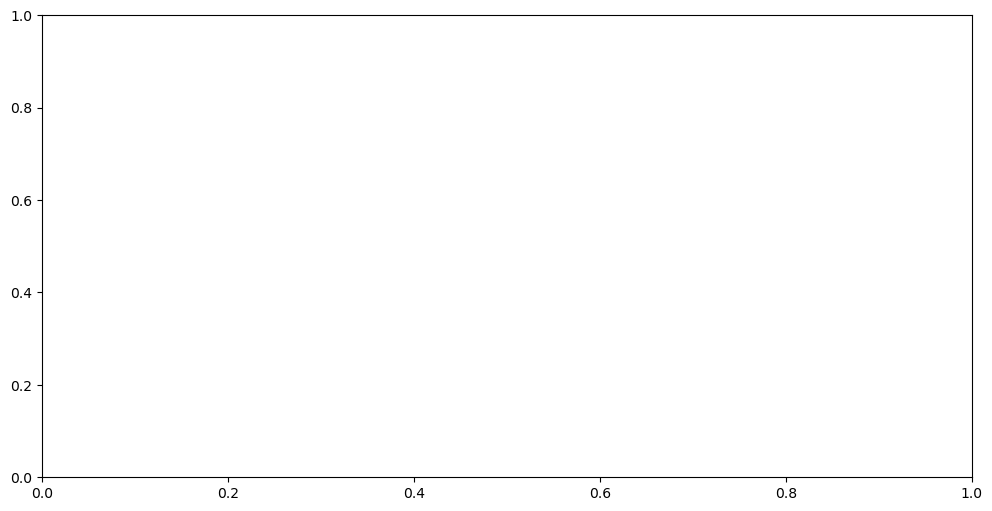

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Duplicate your master_data DataFrame to avoid tampering with the original
duplicated_master_data = master_data.copy()

# Extract the relevant column for time series forecasting (e.g., 'Profit')
data = duplicated_master_data[['Profit']].copy()

# Normalize the data to a range between 0 and 1
scaler = MinMaxScaler()
data['Profit'] = scaler.fit_transform(data[['Profit']])

# Define a function to create time series samples with a given look-back window
def create_time_series_data(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

# Set the look-back window for creating time series samples
look_back = 30  # You can adjust this window size

# Create time series samples
X, y = create_time_series_data(data.values, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Adjust date_index_train to match the length of y_train
date_index_train = data.index[look_back:look_back + train_size]

# Find the minimum length of the two arrays
min_length = min(len(date_index_train), len(y_train))

# Slice both arrays to have the same length
date_index_train = date_index_train[:min_length]
y_train = y_train[:min_length]

# Define the TensorFlow RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(look_back, 1)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Prepare the date index for plotting
date_index_test = data.index[train_size + look_back:]

# Plot the training and testing predictions
plt.figure(figsize=(12, 6))
plt.plot(date_index_train, y_train, label='Actual (Train)')
plt.plot(date_index_test, y_test, label='Actual (Test)')
plt.plot(date_index_train, y_train_pred, label='Predicted (Train)', linestyle='--')
plt.plot(date_index_test, y_test_pred, label='Predicted (Test)', linestyle='--')
plt.title('Profit Margin Forecasting')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.legend()
plt.show()


In [ ]:
master_data['Transaction ID'].unique()

array([10000011, 10000012, 10000013, ..., 10440105, 10440106, 10440107])


# Data Analysis Project: Cab Service Industry Investment Evaluation

## **Executive Summary:**

In today's data-driven landscape, making informed investment decisions is paramount for a private firm seeking to thrive in a competitive market. This data analysis project delves into the cab service industry, offering a comprehensive evaluation of two prominent cab companies, Pink Cab and Yellow Cab. The aim is to provide actionable insights that can guide the firm's investment choices, customer targeting strategies, seasonal planning, city selection, and continuous monitoring efforts. 

This comprehensive analysis encompasses financial analysis, customer targeting, seasonal planning, city selection, and a commitment to data-driven decision-making, ensuring a well-rounded approach to achieving success in this dynamic market.

## **Strengths and Weaknesses - Pink Cab:**

**Strengths:**

- **Steady Profit Margin Growth:** Pink Cab has exhibited consistent profit margin growth from May 2018 to January 2019, rising from 25 to 75 without significant dips.
- **Customer Demographics:** Our analysis highlights a strong presence of Pink Cab among the age group 18-35 and the income group earning 60000+, presenting an opportunity for targeted marketing.

**Weaknesses:**

- **Lower Profit Margin:** Pink Cab maintains an average profit margin of approximately 62.62, which is significantly lower than Yellow Cab's margin.
- **Profit Margin Forecast:** The profit margin forecast suggests a potential decline, reaching around 75 profit margin, introducing uncertainty in future profitability.

## **Strengths and Weaknesses - Yellow Cab:**

**Strengths:**

- **Higher Average Profit Margin:** Yellow Cab boasts a substantially higher average profit margin of around 157.17, indicating strong financial performance.
- **Historical Profit Margin Peaks:** Yellow Cab reached profit margin highs of 250, showcasing its capacity for profitability.

**Weaknesses:**

- **Profit Margin Volatility:** Yellow Cab's profit margin has experienced significant volatility, with lows of 75 profit margin points.
- **Profit Margin Forecast:** While Yellow Cab's forecast suggests stabilization around 125 profit margin, it remains below its historical highs.

## **Conclusions and Recommendations for Pink Cab:**

**Conclusion:**
Pink Cab's stable profit margin growth, coupled with its presence in key customer demographics, presents opportunities for revenue growth. However, its lower average profit margin and the profit margin forecast uncertainty necessitate a cautious approach.

**Recommendations:**

1. **Profit Margin Stabilization:** Pink Cab should focus on strategies to stabilize its profit margin, potentially through cost optimization or pricing adjustments.
2. **Customer Retention:** Leveraging its strong presence in the 18-35 and 60000+ income group, Pink Cab should implement customer retention programs and loyalty initiatives.
3. **Continuous Monitoring:** Regularly monitor profit margins and customer demographics to adapt to market changes effectively.

## **Conclusions and Recommendations for Yellow Cab:**

**Conclusion:**
Yellow Cab's significantly higher average profit margin and historical profitability peaks make it an attractive investment option. However, its profit margin volatility and the need to regain previous highs require strategic planning.

**Recommendations:**

1. **Profit Margin Stabilization:** Yellow Cab should focus on strategies to stabilize its profit margin around 125 and mitigate volatility.
2. **Market Expansion:** Leverage its profitability to explore opportunities for expanding operations in promising markets.
3. **Continuous Monitoring:** Regularly monitor profit margins and market dynamics to adapt to changes effectively.

## **Conclusions and Recommendations for the Private Firm:**

**Conclusion:**
The private firm faces a critical investment decision in the cab service industry. Both Pink Cab and Yellow Cab offer unique strengths and weaknesses, and the choice should align with the firm's risk tolerance and strategic objectives.

**Recommendations:**

1. **Investment Choice:** Given Yellow Cab's higher profit margin and profitability potential, the private firm is strongly recommended to prioritize investment in Yellow Cab. However, consider risk mitigation strategies.
2. **Strategic Planning:** Develop a robust strategic plan for entering the cab service market, including city selection and customer targeting.
3. **Optimal Investment Timing:** Recognize the significance of timing in your investment. The observed increase in revenue and profit over the course of the year suggests that the cab service industry experiences seasonal variations. Consider initiating your investment during the months that historically increase its profit margins while growing revenue (March-December), as this will likely lead to higher returns
4. **Growth Potential:** Allocate resources and marketing efforts strategically, with an emphasis on capitalizing on the months of increased revenue (March through December) and profit to maximize returns. An increase in profit margins and revenue from March to December suggests growth potential in March, though the extent of that potential depends on various factors. It's advisable to conduct a comprehensive analysis of market conditions, industry trends, and company-specific factors to make an informed assessment of growth potential in any given month.
5. **Risk Management:** Understand the market dynamics and risks associated with the cab service industry, and have contingency plans in place.
6. **Continuous Monitoring:** Establish a data-driven decision-making culture and continuously monitor the performance of the chosen cab company and market conditions.

By implementing these recommendations and considering the insights provided in the conclusion and recommendation section, the private firm can make informed decisions and strategically position itself for success within the cab service industry.

---
